# Facebook Message Analyzer

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>

In [44]:
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 10
MESSAGE_BOUND = 1000

In [45]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [46]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0

In [47]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 278 chats...
EvanandJosh_tixQSIK0rw
josephkim_wc-gnd497g
IsabelleThomasandVicki_4iedrs1NaQ
michaelconnolly_twcasq1vow
jackiesun_rtokhr4twa
jasondai_m2ot31uiwq
paulflanagan_wwlmvncngq
vickiyang_zowdtkwthw
maxkopinsky_a_uvwqjvsa
jackieanderson_qpcuojahyg
ChiefKiefSquad_5ZYtGXOGSg
phillippiersonmichalak_mzhbvxbcpa
emmaandnina_bxisp25mlg
SofiaAntonelli_jLVZpkEDpA
tylerjames_j90xf2qcog
sarahadamaishaand4others_eakoonjyxg
jackieandjonathan_z-k3clveyw
runlinwang_kvyc2pk0sa
jegoolee_nveh7vxzkq
DianneLee_LZlDCm-ZiQ
joshsteinberg_ffhdjduomq
madeleineshaw_1i6qxo2iog
evangates_ctuwizidvq
shaashwatsharma_y8o7bp_p4w
jasontrinh_cxenglckua
FamDIY_olBH9selug
vld_pvavs9ux0q
ninayee_duy9eih6ua
sarahandemma_ilognkpkdg
brandonzhang_lgedliayaw
AsmatullahAziziArab_X_g3Y61xdQ
HugeFishIsFinished_v-t5PFHl8A
pauljang_089o3yvxtg
JanetMariadoss_9lCL6InUWA
statsthing_NITNOO_jAg
maximgriner_nultshtvrw
jeongheeanddianne_qvnk-cnpsa
ethankee_ld-twtpz3q
mosesmayer_n1gdvw4d_g
IshaJha_M8P8RfHw4A
jaimanbharadwa_t

In [48]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 1000 messages - InternetOfToast_sAyut9BWfg
1 - 944 messages - CEMC_lOPrdHjcLw
2 - 933 messages - RyanLeung_DHbJKOyZqg
3 - 752 messages - EvanAnderson_QIeO_DoTcA
4 - 684 messages - statsthing_NITNOO_jAg
5 - 664 messages - PotassiumPomegranate_GV2a-mIo4A
6 - 644 messages - RogerRamesh_1y1p96UQWg
7 - 607 messages - EricTexeria_l90UoHIBVg
8 - 602 messages - LinguisticsClub_Z15WPLsKYA
9 - 544 messages - TomoyaIchikawa_w_dqAvM2_g
10 - 539 messages - neDe6RAXrQ
11 - 513 messages - LucyYing_rGKEmDuDPA
12 - 488 messages - SeanHuang_Ywk2gvpDoQ
13 - 459 messages - JeongheeBae_V5QatHa0Dg
14 - 452 messages - JeffreyGu_B7ietxT7KA
15 - 449 messages - RachelHorrigan_VAri4VLNow
16 - 425 messages - DavidKim_GbTX7NIu-A
17 - 396 messages - IsabelleThomasandVicki_4iedrs1NaQ
18 - 367 messages - EricZhu_uHGWlQyFFA
19 - 346 messages - AlisonZeng_pl9GIbrg7g
20 - 345 messages - Rides_W93itzl12g
21 - 300 messages - JoshFleckner_2aomYB7kfQ
22 - 293 messages - jackieanderson_qpcuojahyg
23 - 273 messages - Davi

In [49]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)

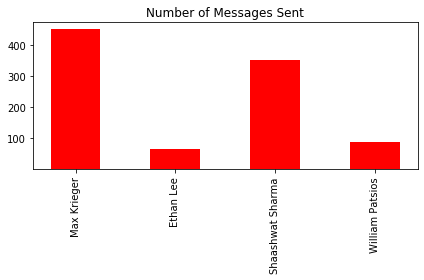

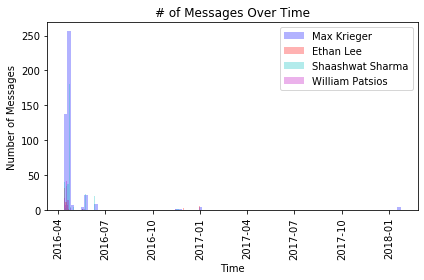

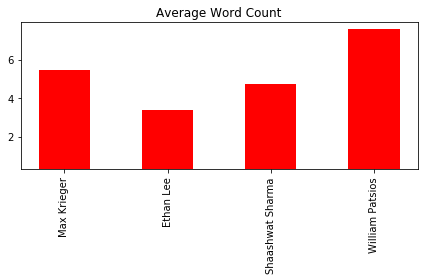

In [50]:
plot(0)

In [76]:
def average_time_between (chat_number):
    lol = {}
    for person in final_data_times[chat_number]:
        print(person)
        counter = 1
        yo = 0
        for i in range(0, len((final_data_times[chat_number]).get(person))-1):
            counter += 1
            hi = ((final_data_times[chat_number]).get(person))[i] - ((final_data_times[chat_number]).get(person))[i+1]
            yo += hi.total_seconds()
        lol[str(person)] = (yo/counter)
    plotted_data = lol
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Time Between Messages (Seconds)')
    pl.tight_layout()
    pl.show()

In [77]:
def participation_rates (chat_number):
    lol = {}
    total_messages = 0
    x = final_data_messages[chat_number]
    for person in final_data_times[chat_number]:
        smallest = ((final_data_times[chat_number]).get(person))[0]
        largest = ((final_data_times[chat_number]).get(person))[0]
        for i in range(1, len((final_data_times[chat_number]).get(person))):
            hi = ((final_data_times[chat_number]).get(person))[i] - smallest
            hey = ((final_data_times[chat_number]).get(person))[i] - largest
            yo = hi.total_seconds()
            yi = hey.total_seconds()
            if(yo < 0):
                smallest = ((final_data_times[chat_number]).get(person))[i]
            if(yi > 0):
                largest = ((final_data_times[chat_number]).get(person))[i]
        lol[person] = (x[person]/((largest - smallest).total_seconds()))*86400
    counter = 0
    counter1 = 0
    for a in lol:
        counter +=1
        counter1 += lol[a]
    print("Number of messages per day for each participant: ") 
    print(lol)
    print("Average participation rate in this chat (messages per day):")
    print((counter1 / counter))